<a href="https://colab.research.google.com/github/quamranhasan/KAIST_CS372-NLP_with_python/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk, re, pprint
nltk.download('gutenberg')
nltk.download('brown')
nltk.download('words')
nltk.download('cmudict')
nltk.download('wordnet')
#for problem2
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') #2c
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Problem 1 (4 points)**


Write a program to implement an algorithm for discovering English word squares, a kind of n × n crossword in which the entry in the nth row is the same as the entry in the nth column. The input and output of the program should be n (the number of rows or columns) and the list of words (e.g., [“CAT”, “ATE”, “TEA”]), respectively. The range of input value n is from 3 to 5. The square below is a simple crossword when n=3.


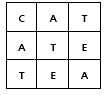

In [ ]:

"""check if the list of words given form a square"""
def if_square(words):
    n = len(words[0])
  
    #match the words, if its a mismatch return False
    for i in range(n):
        column_word = ''.join(words[j][i] for j in range(n))
        if column_word != words[i]:
            return False
    return True



"""get the list of words that matches the restriction """
def filter_word_list(n):
    word_list = nltk.corpus.words.words()

    #include words of size n
    filtered_words = []
    for word in word_list:
      if len(word) == n:
        filtered_words.append(word.upper())

    return filtered_words


def discover_word_squares(n):
    #list to store ans
    word_squares = []
    word_list = filter_word_list(n)

    def backtrack(square):
        #we restrict the list to only 200, because of long runtime
        if len(word_squares)==200:
          return

        #when the required length is reached
        if len(square) == n:
            #check validity
            if if_square(square):
                #if valid append to the final list
                word_squares.append(square[:])
            return

        #prefix of word built in the square
        #concatenate the ith character from each word in current row
        prefix = ''.join(square[i][len(square)] for i in range(len(square)))

        """
        iterate over word list
        if prefix is matched, recursively build the square 
        """
        for word in word_list:
            if word.startswith(prefix):
                square.append(word)
                backtrack(square)
                square.pop()

    backtrack([])

    return word_squares


#we take the example of n=4
n = 5

word_squares = discover_word_squares(n)

#to constrict the outputs we manually print only 10 outputs
for square in word_squares[0:10]:
    print(square)
    print()


['AALII', 'ABASH', 'LAZAR', 'ISAWA', 'IHRAM']

['AALII', 'ABELE', 'LEGER', 'ILEON', 'IERNE']

['AALII', 'ABELE', 'LEPER', 'ILEON', 'IERNE']

['AALII', 'ABELE', 'LEVER', 'ILEON', 'IERNE']

['AALII', 'ABELE', 'LEVIR', 'ILIAN', 'IERNE']

['AALII', 'ABIDE', 'LIBER', 'IDEAN', 'IERNE']

['AALII', 'ABIDE', 'LIBER', 'IDEAN', 'IERNE']

['AALII', 'ABIDE', 'LIFER', 'IDEAN', 'IERNE']

['AALII', 'ABIDE', 'LIKER', 'IDEAN', 'IERNE']

['AALII', 'ABIDE', 'LIMER', 'IDEAN', 'IERNE']



**Problem 2 (8 points)**

Freely choose any single English news that is equal to or longer than three paragraphs.

In [ ]:
#reference : https://news.yahoo.com/british-missiles-destroy-vladimir-putin-110612355.html
paragraph = '''
President Zelenskyy's latest visit to Britain has resulted in an offer of air-defence missiles and attack drones. In combination with last week's decision to send long-range Storm Shadow missiles, and plans for pilot training and assistance to facilitate F16 transfers from other nations, this is a much more significant step in the conflict than “just” another increase in Ukraine's existing military stockpile.

Britain's latest offers of weaponry are the most significant to date, and are pushing the boundaries of what can be offered by others. Time and again Britain has driven other countries to action by being the first to act on certain capabilities; the first to provide tanks, the first Western leader to visit during the invasion, and as of last Friday, the first to provide long range missiles capable of hitting Russia's soft underbelly. If they can extend that to facilitating combat aircraft transfers, Ukraine will finally get the level playing field they deserve and need.

With the war having largely stagnated over the winter around well-drawn battle lines, the British Storm Shadow missiles are a genuine game-changing capability for the Ukrainian armed forces. This conflict has, as all long attritional wars do, become a battle of logistics, where the ability to deplete, disrupt or destroy the enemies' logistics becomes a critical aim.

To date, Russia largely enjoyed a safe rear area, immune from attack from or through the air. Now Kyiv has longer range British missiles, all Russian equipment inside Ukraine - including Crimea - is at risk. Russian frontlines were fragile already, so concerted attacks on their rear areas will make their ability to hold Ukrainian territory even more difficult. If Ukraine can use them effectively in combination with ground offensives, we could see significant successes over the summer.

Make no mistake: this will hurt Russia's forces. The longer range missiles and drones will make up for Ukraine's lack of modern airpower, but this latter element needs attention too. The UK's offer of pilot training will be welcome, but that is a longer term fix; if the UK can act as a go-between for more immediate transfers of F16s that will be a much more significant contribution to the immediate situation. Russian aviation is already relatively impotent, and an increase in Ukraine's air force capability will make them increasingly so. It would also allow Kyiv to launch unpredictable long range strikes from multiple axes.

But, importantly, these new additions don't signal a swift end to the war; Russia remains a formidable foe and the West's assistance to date has come only just in time to halt Russian advances and stop the defeat of Ukraine. With increased urgency, and the greater capability now being offered the tide can be slowly turned in Ukraine's favour. The sooner Russia recognises it cannot and will not win, the sooner this war comes to an end.'''

(a) 3 points

Now develop a simple extractive summarization program, which prints the sentences of a document which contain the highest total word frequency. 
Use FreqDist() to count word frequencies, and sum the frequencies of the words in each sentence. 
Rank the sentences according to their score. 
Finally, print the three highest-scoring sentences in document order.
You can use nltk function to split the raw paragraph into sentences. 

In [ ]:
def extractive_summary(passage):

    # Tokenize the document into sentences
    sentences = nltk.sent_tokenize(passage)

    #tokenize each sentence into words
    words = []
    for sentence in sentences:
      for word in nltk.word_tokenize(sentence):
        words.append(word.lower())

    #calculate word frequencies
    word_frequencies = nltk.FreqDist(words)
    #calculate sentence score
    scores = {}
    for i, sentence in enumerate(sentences):
        score = sum(word_frequencies[word.lower()] for word in nltk.word_tokenize(sentence))
        scores[i] = score
    
    # Rank sentences
    # use reverse = True for descending
    ranked_sents = sorted(scores, key=scores.get, reverse=True)

    #print top3
    #we maintain original order in the passage
    required_sents = sorted(ranked_sents[:3])
    for index in required_sents:
        print(sentences[index])

extractive_summary(paragraph)


Time and again Britain has driven other countries to action by being the first to act on certain capabilities; the first to provide tanks, the first Western leader to visit during the invasion, and as of last Friday, the first to provide long range missiles capable of hitting Russia's soft underbelly.
The UK's offer of pilot training will be welcome, but that is a longer term fix; if the UK can act as a go-between for more immediate transfers of F16s that will be a much more significant contribution to the immediate situation.
But, importantly, these new additions don't signal a swift end to the war; Russia remains a formidable foe and the West's assistance to date has come only just in time to halt Russian advances and stop the defeat of Ukraine.


(b) 2 points

For this time, remove the stopwords when you count the sum of frequencies and do as you did before. After that, print the three highest-scoring  sentences in document order, as you have done in 2-(a). You may use the code or the function you defined from 2-(a).

In [ ]:
def extractive_summary(passage):

    # Tokenize the document into sentences
    sentences = nltk.sent_tokenize(passage)

    #tokenize each sentence into words
    words = []
    for sentence in sentences:
      for word in nltk.word_tokenize(sentence):
        #taking stopwords into account
        if word.lower() not in stopwords.words('english'):
          words.append(word.lower())

    #calculate word frequencies
    word_frequencies = nltk.FreqDist(words)
    
    #calculate sentence score
    scores = {}
    for i, sentence in enumerate(sentences):
        score = sum(word_frequencies[word.lower()] for word in nltk.word_tokenize(sentence))
        scores[i] = score
    
    # Rank sentences
    # use reverse = True for descending
    ranked_sents = sorted(scores, key=scores.get, reverse=True)

    #print top3
    #we maintain original order in the passage
    required_sents = sorted(ranked_sents[:3])
    for index in required_sents:
        print(sentences[index])

extractive_summary(paragraph)


In combination with last week's decision to send long-range Storm Shadow missiles, and plans for pilot training and assistance to facilitate F16 transfers from other nations, this is a much more significant step in the conflict than “just” another increase in Ukraine's existing military stockpile.
Time and again Britain has driven other countries to action by being the first to act on certain capabilities; the first to provide tanks, the first Western leader to visit during the invasion, and as of last Friday, the first to provide long range missiles capable of hitting Russia's soft underbelly.
This conflict has, as all long attritional wars do, become a battle of logistics, where the ability to deplete, disrupt or destroy the enemies' logistics becomes a critical aim.


(c) 3 points

You may use POS tags for this part. Using a pos tagger, remove some types of words that you think that are not important when you count the sum of frequencies for summarization. After that, print the three highest-scoring  sentences in document order, as you have done in 2-(a). Please mention what kinds of types you deleted in the report and why you did so. (You don't need to delete stopwords for this part.)

In [ ]:
#nltk.help.upenn_tagset()
def extractive_summary(passage):

    #POS to exclude
    exclude = ["$","'","(",")",",","--",":", "CC", "DT", "EX", "FW", "IN", "LS","PDT","PRP", "TO", "SYM", "WRB" ]
    # Tokenize the document into sentences
    sentences = nltk.sent_tokenize(passage)

    #tokenize each sentence into words
    words = []
    for sentence in sentences:
      #check if POS is to be excluded or not
      for word, pos in nltk.pos_tag(nltk.word_tokenize(sentence)):
        if pos not in exclude:
          words.append(word.lower())

    #calculate word frequencies
    word_frequencies = nltk.FreqDist(words)
    
    #calculate sentence score
    scores = {}
    for i, sentence in enumerate(sentences):
        score = sum(word_frequencies[word.lower()] for word in nltk.word_tokenize(sentence))
        scores[i] = score
    
    # Rank sentences
    # use reverse = True for descending
    ranked_sents = sorted(scores, key=scores.get, reverse=True)

    #print top3
    #we maintain original order in the passage
    required_sents = sorted(ranked_sents[:3])
    for index in required_sents:
        print(sentences[index])

extractive_summary(paragraph)


In combination with last week's decision to send long-range Storm Shadow missiles, and plans for pilot training and assistance to facilitate F16 transfers from other nations, this is a much more significant step in the conflict than “just” another increase in Ukraine's existing military stockpile.
Time and again Britain has driven other countries to action by being the first to act on certain capabilities; the first to provide tanks, the first Western leader to visit during the invasion, and as of last Friday, the first to provide long range missiles capable of hitting Russia's soft underbelly.
The UK's offer of pilot training will be welcome, but that is a longer term fix; if the UK can act as a go-between for more immediate transfers of F16s that will be a much more significant contribution to the immediate situation.


**Problem 3 (8 points)**

Write programs to process the Brown Corpus hobby category and find answers to the following questions.

In [ ]:
from nltk.corpus import brown

(a) 3 points

Using the pos tags provided by the Brown Corpus, get the 10 most frequently appearing pos bigrams that come together in the hobby category. (ex. (NOUN, VERB), (VERB, NOUN) ... The order should also be checked)

In [ ]:
#tagged words in the hobby category
tagged_words = brown.tagged_words(categories="hobbies")

#get POS bigrams
pos_bigrams = list(nltk.bigrams(tag for (word, tag) in tagged_words))

#get frequencies
pos_bigram_freq = nltk.FreqDist(pos_bigrams)

#print top 10
for pos_bigram, frequency in pos_bigram_freq.most_common(10):
    print(pos_bigram,end =", ")


('AT', 'NN'), ('NN', 'IN'), ('IN', 'AT'), ('JJ', 'NN'), ('NN', '.'), ('IN', 'NN'), ('NN', 'NN'), ('AT', 'JJ'), ('NN', ','), ('NNS', 'IN'), 

(b) 2 points

Using the pos tags as you did above, print the 10 most frequently appearing pos orders of sentences. For example if the sentence is constructed with POS of (NOUN, VERB, ADVERB, ADJECTIVE, NOUN, VERB), this is the pos order of the sentence.

In [ ]:
#tagged sentences in the hobby category
tagged_sentences = brown.tagged_sents(categories="hobbies")

#list of orders
orders = []

#extract POS bigrams
for sentence in tagged_sentences:
  tags = [tag for (word, tag) in sentence]
  pos_order = tuple(tags)
  orders.append(pos_order)

#print(orders)
#calculate frequencies
pos_bigram_freq = nltk.FreqDist(orders)


# Print 10 most frequent orders
for order, frequency in pos_bigram_freq.most_common(10):
    print(order)

('CD', '.')
('NN$-HL', 'NN-HL', 'NN-HL', ':-HL')
('.',)
('NNS-HL',)
('WDT-HL', 'PPS-HL', 'DOZ-HL', ':-HL')
('WRB-HL', 'TO-HL', 'VB-HL', ':-HL')
('CD-HL', '.-HL')
('NN-HL',)
(')',)
('JJ-HL', 'NNS-HL')


(c) 3 points

From the result of (b), print only the 5 most frequently appearing orders from the sentences that have more than 6 words.

In [ ]:
#tagged sentences in the hobby category
tagged_sentences = brown.tagged_sents(categories="hobbies")

#list to orders
orders = []

#extract POS bigrams
for sentence in tagged_sentences:
  #check if length is more than 6 words
  if len(sentence) > 6:
    tags = [tag for (word, tag) in sentence]
    pos_order = tuple(tags)
    orders.append(pos_order)

#calculate frequencies
pos_bigram_freq = nltk.FreqDist(orders)


# Print 10 most frequent orders
for order, frequency in pos_bigram_freq.most_common(5):
    print(order)

('NP', 'NP', '(', 'NN-TL', 'NP', 'NP', ')', 'CD', '.', '.')
('NP', 'NP', '(', 'NP', 'NP', 'NP', ')', 'CD', '.', '.')
('PP$', 'JJT', 'NN', 'IN', 'NN', 'BEZ', 'CD', '.')
('VB', 'JJ', 'NN', 'IN', 'NN', 'IN', 'NN', '.')
('VB', 'VBG', 'NN', 'IN', 'NN', 'NN', '.')


**Problem 4 (10 points)**

Write programs to process the ‘romance' corpus of Brown Corpus(categories='romance') and find answers to the following questions:


In [ ]:
from nltk.corpus import brown

(a) 4 points

Make a dictionary that has a key of the number of tags for a word that appears in the romance brown corpus. The value should be the words. (ex. dict[3] = words that have 3 different pos tags)

In [ ]:
tagged_words = brown.tagged_words(categories="romance")

#dictionary for storing words and tags
dict1 = {}


for word,tag in tagged_words:
  #if the word is not present add a key with the tag
  if word.lower() not in dict1:
    dict1[word.lower()] = set(tag)
  #add the tag to the set of tags for that word
  dict1[word.lower()].add(tag)

#dictionary for storing count of tags and word list
pos_count = {}

#go through the key value pairs
for word,set_of_pos in dict1.items():
  count = len(set_of_pos)
  if count not in pos_count:
    #list for storing words
    pos_count[count] = [word]
  pos_count[count].append(word)

for count,list_of_words in pos_count.items():
  print(count, " : ", list_of_words)


3  :  ['they', 'they', 'neither', 'them', 'he', 'could', 'have', 'and', 'six', 'each', 'evening', 'its', 'never', 'streets', 'yet', 'if', 'would', 'him', 'bees', 'june', 'from', 'trays', 'bats', 'night', 'their', 'bodies', 'into', 'street', 'lights', 'name', 'although', 'filippo', 'rossi', 'but', 'signore', 'this', 'quarters', 'always', 'a', 'elders', 'sunday', 'saturday', 'nothing', 'parents', 'touch', 'hand', 'kiss', 'she', 'with', 'shoulders', 'buttocks', 'hundred', 'other', 'way', 'blind', 'without', 'anything', 'except', 'directly', 'front', 'orange', 'streetcars', 'away', 'place', 'women', 'bigger', 'we', 'torino', 'eh', 'herself', 'airs', 'carry', 'ours', 'thighs', 'pretty', 'speeches', 'dante', 'actresses', 'get', 'henh', 'fingers', 'rosaries', 'excitedly', 'beneath', 'chins', 'hairs', 'be', 'mouths', 'sweeter', 'taste', 'new', 'again', 'now', 'nobody', 'people', 'know', 'time', 'thinner', 'seams', 'stockings', 'an', 'might', 'fleas', 'yellow', 'onto', 'eyes', 'miniature', 'sun

(b) 6 points

For this time, we are going to group words whose original form is the same. Group all similar words together and make a dictionary with the number of different pos tags as you have done above. (ex. The three words predict and predicted, prediction can be grouped.)
You can use your own way to group words. One way can be grouping words with high similarity or checking words with some patterns. Explain details in your report. 

In [ ]:
tagged_words = brown.tagged_words(categories="romance")


wnl = nltk.WordNetLemmatizer()
#dictionary for storing words and tags
dict1 = {}


for word,tag in tagged_words:
  #word in base form
  lemma = wnl.lemmatize(word.lower())
  #if the word is not present add a key with tag
  if lemma not in dict1:
    dict1[lemma] = set(tag)
  #add the tag to the set of tags for that word
  dict1[lemma].add(tag)

#dictionary for storing count of tags and word list
pos_count = {}

#go through the key value pairs
for lemma,set_of_pos in dict1.items():
  count = len(set_of_pos)
  if count not in pos_count:
    #list for storing words
    pos_count[count] = [lemma]
  pos_count[count].append(lemma)


for count,list_of_words in pos_count.items():
  print(count, " : ", list_of_words)

3  :  ['they', 'they', 'neither', 'them', 'he', 'could', 'have', 'bell', 'church', 'and', 'six', 'each', 'tone', 'never', 'yet', 'if', 'would', 'him', 'bee', 'door', 'june', 'from', 'their', 'into', 'although', 'filippo', 'rossi', 'country', 'but', 'signore', 'this', 'always', 'month', 'nothing', 'touch', 'kiss', 'thing', 'she', 'with', 'buttock', 'dollar', 'other', 'without', 'anything', 'except', 'directly', 'front', 'orange', 'away', 'bigger', 'we', 'torino', 'eh', 'herself', 'part', 'carry', 'head', 'ours', 'thigh', 'pretty', 'dante', 'actress', 'henh', 'rosary', 'excitedly', 'beneath', 'be', 'sweeter', 'taste', 'new', 'again', 'now', 'nobody', 'people', 'thinner', 'seam', 'stocking', 'voice', 'an', 'might', 'flea', 'yellow', 'onto', 'miniature', 'sundial', 'anyone', 'perhaps', 'sister', 'remember', 'town', 'outskirt', 'philadelphia', 'bari', 'chieti', 'did', 'park', 'foot', "city's", 'interval', 'toward', 'schuylkill', 'same', 'wall', 'color', 'upward', 'hinge', 'men', 'window', '

**Problem 5 (10 points)**

The word order has two different forms. One is a noun that means 'The arrangement or disposition of people or things in relation to each other according to a particular sequence, pattern, or method.' and the other is a verb that means 'give an authoritative direction or instruction to do something.'. Make a function that can differentiate these two usages by checking the pos tags around the word or considering the meanings or situation.
The function should take an input of a string with sentences and paragraphs and differentiate the meanings of all appearance of the word 'order'. 

In [ ]:
def order_type(passage):  
  tagged = [nltk.pos_tag(nltk.word_tokenize(sentence)) for sentence in nltk.sent_tokenize(passage)]
  #print(tagged)

  for sentence in tagged:
    i = 0

    while i<len(sentence):
      word,tag = sentence[i]

      if word.lower() == 'order':

        ans = "cant determine (by default)"

        if(i>0 and sentence[i-1][1].startswith("JJ")):
          ans = "Noun (due to preceeding adjective)" #large order of fries

        elif(sentence[i+1][1] == "IN"):
          ans = "Noun (due to following preposition or conjunction)" #order for food

        elif(i>0 and sentence[i-1][0].lower() =="please"):
          ans = "Verb (due to Please order)" #please order

        elif(i>0 and sentence[i-1][1] == "TO"):
          ans = "Verb (due to order being given)" # i need to order some fries

        elif(i>0 and sentence[i-1][1].startswith("DT")):
          ans = "Noun (due to instruction given)" #give an order
          
        elif(i>0 and sentence[i-1][1].startswith("PR")):
          ans = "Verb (due to preceeding pronoun)" #he order some fries
          
        elif(sentence[i+1][1].startswith("PR")):
          ans = "Verb (due to following pronoun)" #order them some fries
          
        print(word, ans)
      i+=1

text = "he order me to place and order for some fries"

order_type(text)

order Verb (due to preceeding pronoun)
order Noun (due to following preposition or conjunction)
